In [2]:
# --- Import thư viện ---
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# --- Đọc dữ liệu nodes & edges ---
edges = pd.read_csv('data/edges.csv')
nodes = pd.read_csv('data/nodes.csv')

In [3]:
# --- Tạo đồ thị ---
G = nx.DiGraph()  # Có hướng: reply từ source -> target
G.add_nodes_from(nodes['id'])
for _, row in edges.iterrows():
    G.add_edge(row['source'], row['target'], weight=row['weight'])

print("=== Nguồn dữ liệu & tiền xử lý ===")
print(f"Số lượng nút: {G.number_of_nodes()}")
print(f"Số lượng cạnh: {G.number_of_edges()}")

=== Nguồn dữ liệu & tiền xử lý ===
Số lượng nút: 12548
Số lượng cạnh: 1561


In [4]:
# --- Xóa self-loop ---
G.remove_edges_from(nx.selfloop_edges(G))
print("Đã xóa self-loop nếu có")

# --- Kiểu đồ thị ---
print("Kiểu đồ thị: Có hướng, có trọng số, đồng nhất nút, đồng nhất cạnh")

Đã xóa self-loop nếu có
Kiểu đồ thị: Có hướng, có trọng số, đồng nhất nút, đồng nhất cạnh


In [5]:
# --- Lấy largest weakly connected component ---
largest_cc = max(nx.weakly_connected_components(G), key=len)
G_largest = G.subgraph(largest_cc).to_undirected()
print(f"Số nút trong largest weakly connected component: {G_largest.number_of_nodes()}")

Số nút trong largest weakly connected component: 709


In [6]:
# --- Đường kính & bán kính ---
diameter = nx.diameter(G_largest)
radius = nx.radius(G_largest)
print(f"Đường kính: {diameter}")
print(f"Bán kính: {radius}")

Đường kính: 22
Bán kính: 11


In [7]:
# --- Hệ số phân cụm ---
clustering_global = nx.transitivity(G_largest)  # toàn cục
clustering_local = nx.clustering(G_largest)    # cục bộ
clustering_local_avg = sum(clustering_local.values()) / len(clustering_local)

print(f"Hệ số phân cụm toàn cục: {clustering_global:.4f}")
print(f"Hệ số phân cụm trung bình cục bộ: {clustering_local_avg:.4f}")

Hệ số phân cụm toàn cục: 0.0033
Hệ số phân cụm trung bình cục bộ: 0.0046


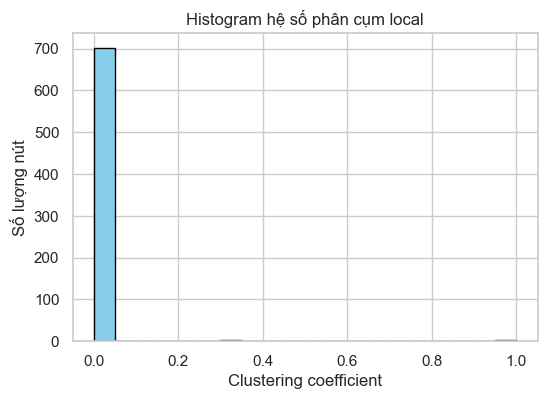

In [8]:

# --- Vẽ histogram hệ số phân cụm ---
plt.figure(figsize=(6,4))
plt.hist(list(clustering_local.values()), bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram hệ số phân cụm local")
plt.xlabel("Clustering coefficient")
plt.ylabel("Số lượng nút")
plt.show()

Độ dài đường đi trung bình: 8.4937


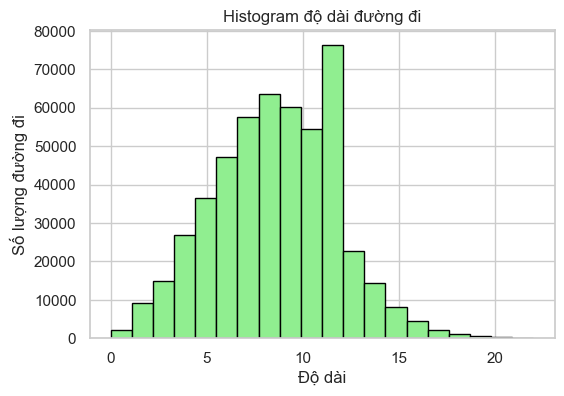

In [9]:
# --- Độ dài đường đi trung bình ---
lengths = []
for node in G_largest.nodes():
    sp = nx.single_source_shortest_path_length(G_largest, node)
    lengths.extend(sp.values())

avg_path_length = sum(lengths)/len(lengths)
print(f"Độ dài đường đi trung bình: {avg_path_length:.4f}")

plt.figure(figsize=(6,4))
plt.hist(lengths, bins=20, color='lightgreen', edgecolor='black')
plt.title("Histogram độ dài đường đi")
plt.xlabel("Độ dài")
plt.ylabel("Số lượng đường đi")
plt.show()

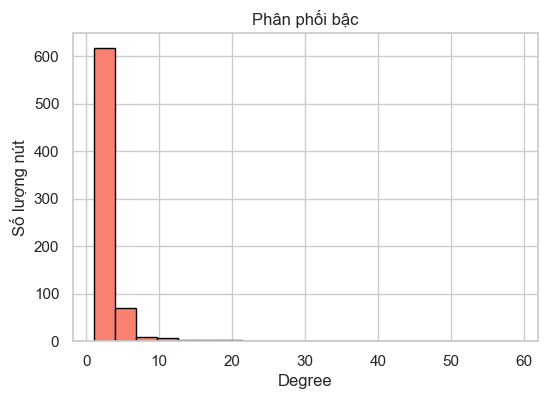

In [10]:
# --- Phân phối bậc ---
degree_sequence = [d for n,d in G_largest.degree()]
plt.figure(figsize=(6,4))
plt.hist(degree_sequence, bins=20, color='salmon', edgecolor='black')
plt.title("Phân phối bậc")
plt.xlabel("Degree")
plt.ylabel("Số lượng nút")
plt.show()

In [11]:
# --- Mô hình hồi quy phân tích degree distribution (log-log) ---
import numpy as np
from scipy import stats

degree_count = pd.Series(degree_sequence).value_counts().sort_index()
degrees = degree_count.index
counts = degree_count.values

# Log-log regression
log_degrees = np.log(degrees[degrees>0])
log_counts = np.log(counts[degrees>0])
slope, intercept, r_value, p_value, std_err = stats.linregress(log_degrees, log_counts)

print(f"Power-law slope: {slope:.4f}, R^2: {r_value**2:.4f}")

Power-law slope: -1.7456, R^2: 0.8173


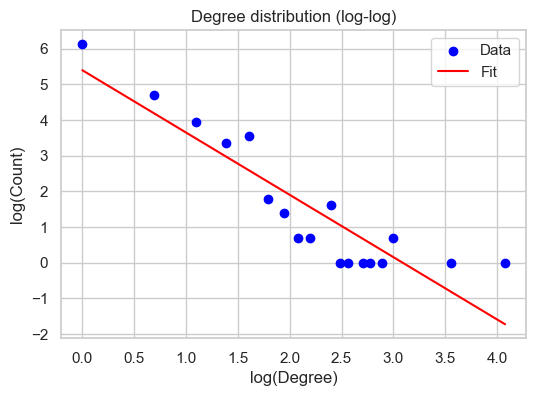

In [12]:
plt.figure(figsize=(6,4))
plt.scatter(log_degrees, log_counts, color='blue', label='Data')
plt.plot(log_degrees, intercept + slope*log_degrees, color='red', label='Fit')
plt.xlabel("log(Degree)")
plt.ylabel("log(Count)")
plt.title("Degree distribution (log-log)")
plt.legend()
plt.show()